# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
CombinedData = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
CombinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
CombinedData['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = CombinedData[CombinedData.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMice = CombinedData[CombinedData.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicateMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanCombinedMouseData= CombinedData[CombinedData['Mouse ID'] != 'g989']
cleanCombinedMouseData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanCombinedMouseData['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugGrouped = cleanCombinedMouseData.groupby("Drug Regimen")
drugGrouped.head()
meanTumorVol = drugGrouped['Tumor Volume (mm3)'].mean()
medianTumorVol = drugGrouped['Tumor Volume (mm3)'].median()
tumorVolVar = drugGrouped['Tumor Volume (mm3)'].var()
tumorVolStdDev = drugGrouped['Tumor Volume (mm3)'].std()
tumorVolStdErr = drugGrouped['Tumor Volume (mm3)'].sem()

drugRegSumStatistics = pd.DataFrame(({'Mean Tumor Volume': meanTumorVol,
                                  'Median Tumor Volume': medianTumorVol,
                                  'Tumor Volume Variance': tumorVolVar,
                                  'Tumor Volume Std. Dev.': tumorVolStdDev,
                                  'Tumor Volume Std. Err.': tumorVolStdErr}))
drugRegSumStatistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drugGrouped['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

,mean,var,median,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Timepoints')

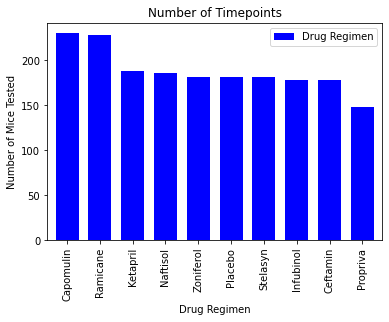

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = cleanCombinedMouseData['Drug Regimen'].value_counts().plot.bar(color='blue', width=0.7, zorder=3)
pandas_bar.legend(loc=1)
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Mice Tested")
pandas_bar.set_title("Number of Timepoints")


([<matplotlib.axis.XTick at 0x1793f4b8c08>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Propriva')])

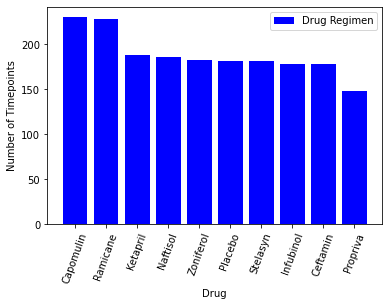

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
yAxis = cleanCombinedMouseData["Drug Regimen"].value_counts()
xAxis = np.arange(len(yAxis))
plt.bar(xAxis, yAxis, color='blue', alpha=1, label='Drug Regimen')
plt.legend(loc="upper right")
plt.xlabel("Drug")
plt.ylabel("Number of Timepoints")
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, yAxis.index.values, rotation=70)

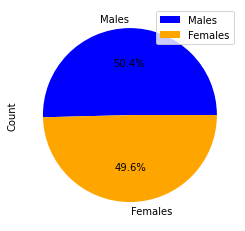

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
femaleMouseData = cleanCombinedMouseData.loc[cleanCombinedMouseData['Sex']=='Female']
femaleMouseCount = femaleMouseData["Mouse ID"].nunique()
maleMouseData = cleanCombinedMouseData.loc[cleanCombinedMouseData['Sex'] =='Male']
maleCount = maleMouseData['Mouse ID'].nunique()
genderData = [['Males',int(maleCount)], ['Females', int(femaleMouseCount)]]
genderDf = pd.DataFrame(genderData, columns=['Sex', 'Count'])
genderDf=genderDf.set_index('Sex')
pieLabel = ['Males', 'Females']
pieColor = ['blue','orange']
genderDf.plot(kind='pie',y='Count' ,autopct='%1.1f%%',colors=pieColor,labels=pieLabel)

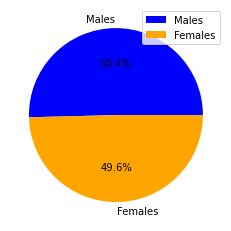

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderList = [maleCount, femaleMouseCount]
plt.pie(genderList,labels=pieLabel,colors=pieColor,autopct='%1.1f%%')
plt.legend(loc="upper right")


## Quartiles, Outliers and Boxplots

In [34]:
#im tired probably gonna take the L on the rest of this, started this on the 28th, the day it was due lol 
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTimePoint = cleanCombinedMouseData.groupby(['Mouse ID']).agg(Timepoint=('Timepoint','max')).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatestTimePoint_CleanCombined = greatestTimePoint.merge(cleanCombinedMouseData,how='inner',on=['Mouse ID', 'Timepoint'])
greatestTimePoint_CleanCombined.tail(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
228,x581,45,Ceftamin,Female,19,28,64.634949,3
229,x613,15,Zoniferol,Female,2,29,48.077646,0
230,x773,45,Placebo,Female,21,30,58.634971,4
231,x822,45,Ceftamin,Male,3,29,61.386660,3
232,x930,25,Naftisol,Male,13,26,53.726101,0
233,y163,45,Infubinol,Female,17,27,67.685569,3
234,y260,45,Ketapril,Female,7,25,62.909441,4
235,y449,15,Ramicane,Male,19,24,44.183451,0
236,y478,45,Placebo,Female,3,25,66.842635,1
237,y601,5,Naftisol,Female,23,25,48.475003,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

